<a href="https://colab.research.google.com/github/RawanKhaled20/CodeCasa-Task3/blob/main/Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawankhaled20","key":"f5a17aecb67ca4675b425dadbe4ab60e"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                       Most Streamed Spotify Songs 2023                    47KB  2023-08-26 11:04:57          21324        653  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023     Credit Card Fraud Detection Dataset 2023           143MB  2023-09-18 10:00:19           2692         94  1.0              
joebeachcapital/students-performance                          Students Performance                                 2KB  2023-08-31 00:50:11           7707        185  1.0              
emilrueh/laptops-and-notebooks-from-2020-2023                 Laptops and N

In [6]:
!kaggle datasets download -d jacksoncrow/stock-market-dataset

 97% 506M/522M [00:07<00:00, 98.5MB/s]
100% 522M/522M [00:07<00:00, 71.2MB/s]


In [ ]:
! unzip stock-market-dataset.zip

In [8]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [14]:
# load dataset
dataset=pd.read_csv('stocks/A.csv')

In [15]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,27.068665,62546300
1,1999-11-19,30.713520,30.758226,28.478184,28.880543,24.838577,15234100
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,27.068665,6577800
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.607880,5975600
4,1999-11-24,28.701717,29.998211,28.612303,29.372318,25.261524,4843200
...,...,...,...,...,...,...,...
5119,2020-03-26,70.000000,74.449997,69.650002,73.720001,73.532867,3267500
5120,2020-03-27,71.550003,73.209999,70.279999,70.910004,70.730003,1829800
5121,2020-03-30,71.059998,73.180000,71.059998,72.669998,72.669998,1486200
5122,2020-03-31,72.339996,72.800003,70.500000,71.620003,71.620003,1822100


<Axes: >

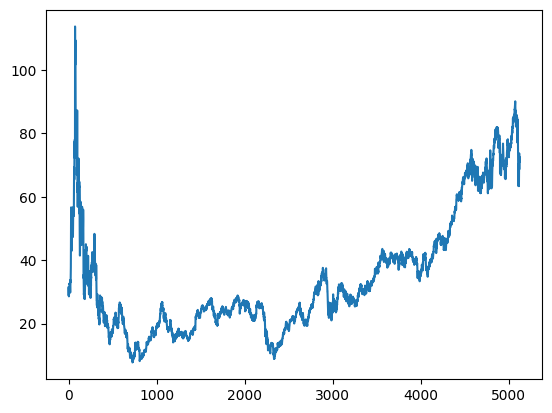

In [16]:
dataset['Close'].plot()

In [17]:
#split dataset
train_set=dataset.iloc[ :int(.90*len(dataset)), :]
test_set=dataset.iloc[int(.90*len(dataset)):, :]

In [18]:
#Set the important features
features=['Open', 'Volume']
#Set the output
out=['Close']

In [19]:
train_set[features]

,Open,Volume
0,32.546494,62546300
1,30.713520,15234100
2,29.551144,6577800
3,30.400572,5975600
4,28.701717,4843200
...,...,...
4606,71.000000,1728100
4607,71.070000,1866300
4608,70.089996,2530400
4609,69.919998,3378100


In [20]:
train_set[out]

,Close
0,31.473534
1,28.880543
2,31.473534
3,28.612303
4,29.372318
...,...
4606,70.680000
4607,69.919998
4608,70.180000
4609,69.900002


In [21]:
#Train model
model=xgb.XGBRegressor()
model.fit(train_set[features], train_set[out])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
test_set[features]

,Open,Volume
4611,69.769997,2379100
4612,69.879997,1583200
4613,68.699997,1690000
4614,67.580002,2594100
4615,67.199997,2263800
...,...,...
5119,70.000000,3267500
5120,71.550003,1829800
5121,71.059998,1486200
5122,72.339996,1822100


In [25]:
y_test=test_set[out]

In [58]:
#Predict test_set
predictions=model.predict(test_set[features])
y_pred_test=predictions

"""for i in range(len(y_test)):
    print("The expected values are ", y_pred_test[i])"""

'for i in range(len(y_test)):\n    print("The expected values are ", y_pred_test[i])'

In [59]:
print("The predicted values: ")
print(predictions)

The predicted values: 
[ 68.55104   70.214516  68.30335   68.763084  68.10113   69.98667
  68.01245   67.3885    68.43544   65.12019   63.643456  68.58243
  65.374374  64.16903   65.979095  66.08094   67.279274  67.63738
  67.176     67.22562   67.22562   68.05517   67.65729   68.620346
  66.64215   66.671486  65.88538   66.02646   68.01245   66.29542
  66.41075   65.83288   65.94815   67.123215  66.85443   69.3564
  67.46108   69.039154  69.34516   65.34329   62.614025  58.887962
  63.536366  63.341755  65.71518   64.40901   64.94747   64.84759
  59.56598   63.499752  63.125725  64.315544  64.02812   66.02492
  63.182537  64.1658    66.544235  66.23314   65.88538   64.38847
  66.69018   67.12125   64.55644   63.40478   62.78421   60.35411
  61.088882  62.873608  61.52318   64.48976   61.26132   60.84259
  61.235985  61.087376  61.027348  61.474236  63.916702  64.61255
  64.88241   64.84759   63.753525  63.18745   63.916702  63.322105
  63.499752  63.937508  63.80308   63.089397  63.82

In [44]:
"""for i in range (len(y_test)):
  print("The actual values are ", y_test.iloc[[i]])"""
y_test

,Close
4611,69.849998
4612,69.400002
4613,67.470001
4614,66.059998
4615,68.199997
...,...
5119,73.720001
5120,70.910004
5121,72.669998
5122,71.620003


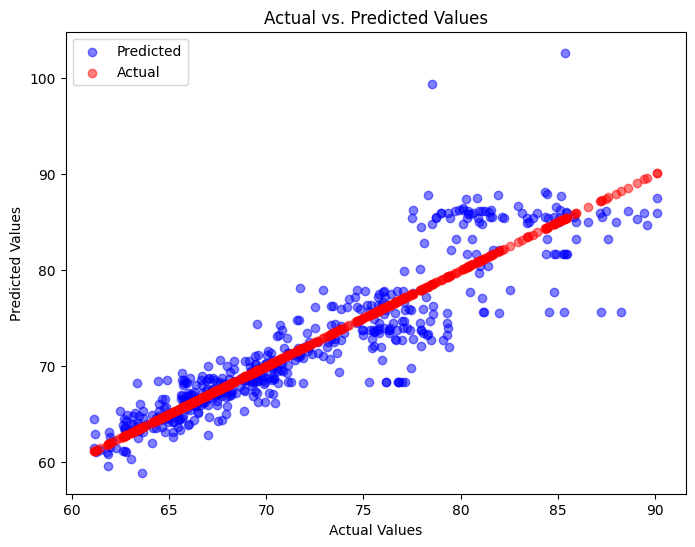

In [36]:
# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 2. Calculate MSE and RMSE
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Print or use the MSE and RMSE values
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Test MSE: 10.18
Test RMSE: 3.19


In [41]:
accuracy = model.score(test_set[features], y_test)
print("The accuracy is",accuracy)

The accuracy is 0.7882465150965844


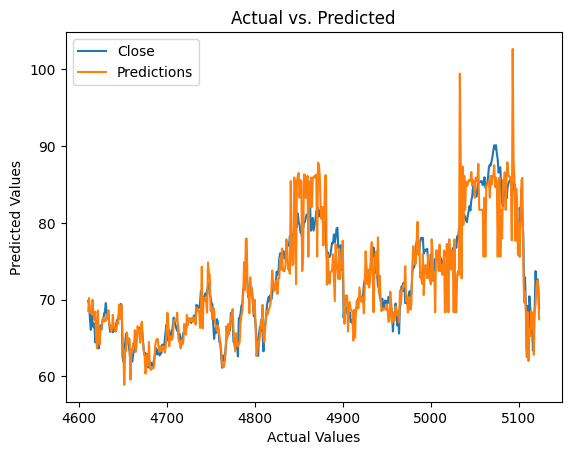

In [49]:
# Assuming the index of test_set represents time or sequence
plt.plot(test_set.index, test_set['Close'], label='Close')
plt.plot(test_set.index, predictions, label='Predictions')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs. Predicted')
plt.show()

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5124 non-null   object 
 1   Open       5124 non-null   float64
 2   High       5124 non-null   float64
 3   Low        5124 non-null   float64
 4   Close      5124 non-null   float64
 5   Adj Close  5124 non-null   float64
 6   Volume     5124 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 280.3+ KB


In [53]:
# Define your sample input data
sample_input = {
    "Open": [67.99] ,         # Opening price of the stock
    "Volume": [1583200],     # Trading volume of the stock
}

# Create a DataFrame
sample_input_df = pd.DataFrame(sample_input)
sample_input_df

,Open,Volume
0,67.99,1583200


In [55]:
predict=model.predict(sample_input_df)
print("The predicted value: ", predict)

The predicted value:  [67.602005]
